In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df_1 = pd.read_csv('BTC_sentiment_price.csv', index_col='Date')

In [3]:
df_1.index = pd.to_datetime(df_1.index)

In [4]:
df_1

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,MACD,MACDs,ATR,OBV,Subjectivity,Polarity,sentiment,negative,positive,neutral
Date,,,,,,,,,,,,,,,,,,
2018-02-25,9796.419922,9923.219727,9407.059570,9664.730469,5706939904,10156.257952,10134.177741,10078.064620,-56.113122,-174.033087,953.619535,1.290495e+11,0.441667,0.220833,0.7788,0.021,0.087,0.892
2018-02-26,9669.429688,10475.000000,9501.730469,10366.700195,7287690240,10259.124372,10151.401627,10122.470093,-28.931534,-145.012777,955.023106,1.363372e+11,0.446667,0.010000,-0.6597,0.080,0.037,0.883
2018-02-27,10393.900391,10878.500000,10246.099609,10725.599609,6966179840,10411.073661,10193.934811,10215.259249,21.324439,-111.745334,931.978626,1.433033e+11,0.518506,0.001623,-0.6705,0.073,0.034,0.892
2018-02-28,10687.200195,11089.799805,10393.099609,10397.900391,6936189952,10475.592983,10209.043372,10243.357886,34.314514,-82.533364,915.173024,1.363672e+11,0.459091,0.039394,0.4939,0.038,0.093,0.869
2018-03-01,10385.000000,11052.299805,10352.700195,10951.000000,7317279744,10531.635812,10264.003122,10352.225904,88.222782,-48.382135,899.774923,1.436844e+11,0.335000,-0.083333,-0.1543,0.097,0.081,0.822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,28987376573,23118.348772,22932.937262,23662.873854,729.936592,595.598717,798.836485,1.310770e+12,0.575510,0.102041,0.1952,0.113,0.136,0.751
2023-02-21,24833.048828,25126.851562,24200.363281,24436.353516,31252098714,23202.067522,23044.301429,23781.870725,737.569296,623.992832,807.954471,1.279518e+12,0.350000,0.083333,0.8225,0.035,0.124,0.841
2023-02-22,24437.417969,24472.339844,23644.318359,24188.843750,30199996781,23291.313616,23129.082342,23844.481959,715.399618,642.274189,809.387829,1.249318e+12,0.283333,0.166667,-0.1027,0.052,0.040,0.908


In [5]:
#Split the dataset into trian and test

train_data_1, test_data_1 = df_1[:int(len(df_1)*0.9)], df_1[int(len(df_1)*0.9):]

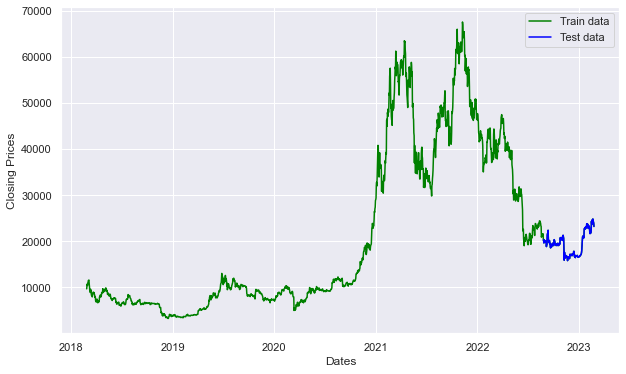

In [6]:
plt.figure(figsize=(10,6))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_1.Close, 'green', label='Train data')
plt.plot(test_data_1.Close, 'blue', label='Test data')
plt.legend()

******************************************************************************************************************************************************************************

## 1. ARIMA MODEL

In [7]:
from pmdarima.arima import auto_arima

In [8]:
arima_model = auto_arima(train_data_1['Close'], error_action='ignore', suppress_warnign=True, stepwise=False, approximation=False, seasonal=False)

In [9]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1643
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -13730.782
Date:                Fri, 27 Oct 2023   AIC                          27473.563
Time:                        12:36:55   BIC                          27505.985
Sample:                    02-25-2018   HQIC                         27485.587
                         - 08-25-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6345     27.020      0.209      0.835     -47.324      58.593
ar.L1          0.9261      0.012     77.310      0.000       0.903       0.950
ar.L2         -0.9497      0.012    -79.013      0.000      -0.973      -0.926
ma.L1         -0.9537      0.009   -108.871      0.000      -0.971      -0.936
ma.L2          0.9776      0.009    112.352      0.000       0.961       0.995
sigma2      1.087e+06   1.69e+04     64.487      0.000    1.05e+06    1.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              5628.04
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              26.24   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
n_future = len(test_data_1)

In [11]:
arima_pred = arima_model.predict(n_periods=n_future, return_conf_int=True, alpha=0.05)

In [12]:
arima_pred = [pd.DataFrame(arima_pred[0], columns=['prediction']), pd.DataFrame(arima_pred[1], columns=['low_95', 'up_95'], index=arima_pred[0].index)]



In [13]:
arima_pred = pd.concat(arima_pred, axis=1)

In [14]:
arima_pred

,prediction,low_95,up_95
2022-08-26,21634.909130,19591.457327,23678.360933
2022-08-27,21590.991408,18740.623280,24441.359537
2022-08-28,21523.657371,18046.144589,25001.170154
2022-08-29,21508.643090,17471.808144,25545.478036
2022-08-30,21564.322326,17014.328226,26114.316426
...,...,...,...
2023-02-20,22539.220219,-4806.882804,49885.323241
2023-02-21,22545.119351,-4877.320918,49967.559619
2023-02-22,22551.379413,-4947.190823,50049.949650
2023-02-23,22557.208865,-5017.241403,50131.659133


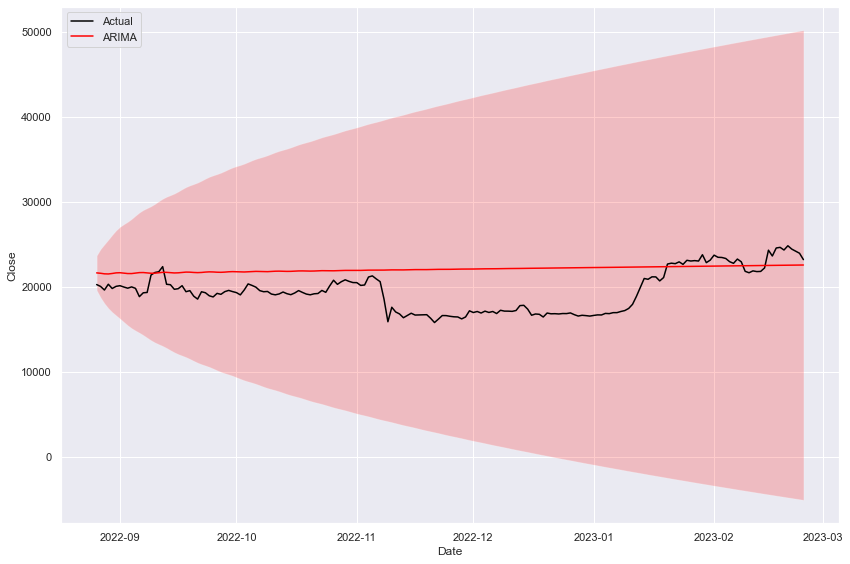

In [15]:
#Print results

fig, ax = plt.subplots(1, figsize=(12, 8))

ax = sns.lineplot(data=test_data_1['Close'], color='black', label= 'Actual')

ax.plot(arima_pred.prediction, color='red', label= 'ARIMA')

ax.fill_between(arima_pred.index, arima_pred.low_95, arima_pred.up_95, alpha=0.2, facecolor='red')

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
# report performance
mse = mean_squared_error(test_data_1.Close, arima_pred.prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_1.Close, arima_pred.prediction)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_1.Close, arima_pred.prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(arima_pred.prediction - test_data_1.Close)/np.abs(test_data_1.Close))
print('MAPE: '+str(mape))

MSE: 12106086.819315514
MAE: 2923.815705898013
RMSE: 3479.380234943504
MAPE: 0.16341654684169693


******************************************************************************************************************************************************************************

## 2. XGBoots MODEL

In [17]:
import xgboost as xgb
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split

In [18]:
# Split the data in target and independant variables

x = df_1.drop(['Close'], axis = 1)

y = df_1['Close']

In [19]:
# Splitting to training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle=False)

In [20]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

model = xgb.XGBRegressor( objective='reg:squarederror')
clf = GridSearchCV(model, parameters)

clf.fit(x_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.005, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400, 'random_state': 42}
Best validation score = 0.9802578428069765
Wall time: 7min 23s


In [21]:
%%time

model_xgb = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model_xgb.fit(x_train, y_train)

Wall time: 982 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.005, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [22]:
y_pred = model_xgb.predict(x_test)

In [23]:
# Create dataframe

prediction = y_test.to_frame().copy()

In [24]:
# Model prediction on test data

prediction['y_predr'] = y_pred

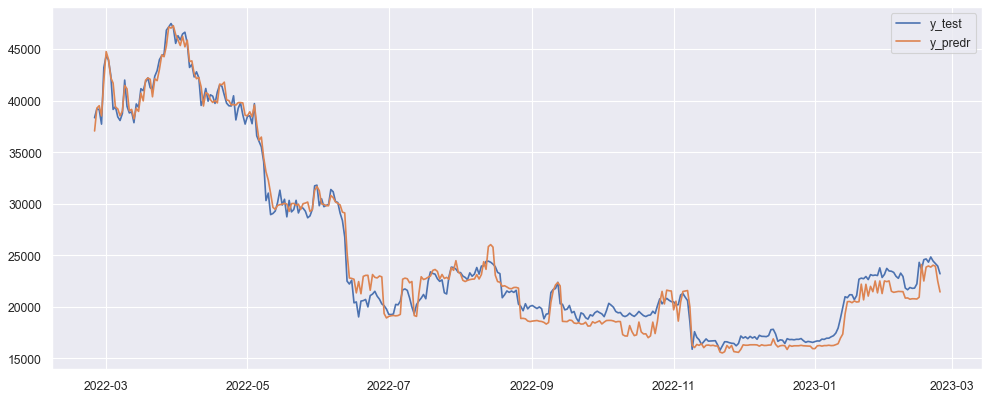

In [25]:
figure(figsize=(15, 6), dpi=80)

plt.plot(prediction['Close'], label='y_test')
plt.plot(prediction['y_predr'], label='y_predr')
plt.legend()
plt.show()

In [26]:
# report performance
mse = mean_squared_error(prediction['Close'], prediction['y_predr'])
print('MSE: '+str(mse))
mae = mean_absolute_error(prediction['Close'], prediction['y_predr'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(prediction['Close'],prediction['y_predr']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction['y_predr'] - prediction['Close'])/np.abs(prediction['Close']))
print('MAPE: '+str(mape))

MSE: 1179253.6455659554
MAE: 883.043891948429
RMSE: 1085.9344573066808
MAPE: 0.039803559099890085


******************************************************************************************************************************************************************************

## 3. Long Short Term Memory (LSTM)

In [45]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU,LSTM, Dropout

In [46]:
#Scale train data

scaler = MinMaxScaler()
scaler = scaler.fit(df_1)
scaled_data = scaler.transform(df_1)

In [47]:
scaled_data

array([[0.10200268, 0.1014717 , 0.09836495, ..., 0.08015267, 0.3625    ,
        0.69405099],
       [0.10002813, 0.10989399, 0.09986313, ..., 0.30534351, 0.15416667,
        0.66855524],
       [0.11129281, 0.11605296, 0.11164285, ..., 0.27862595, 0.14166667,
        0.69405099],
       ...,
       [0.32965329, 0.32354736, 0.32367098, ..., 0.19847328, 0.16666667,
        0.73937677],
       [0.3258174 , 0.32506993, 0.32445593, ..., 0.27480916, 0.30416667,
        0.58923513],
       [0.32201243, 0.31792058, 0.3135865 , ..., 0.        , 0.34583333,
        0.76487252]])

In [48]:
# Ya que el modelo LSTM alamcena memoria a largo plazo, creamos una extructura de 14 periodos.
# Por lo que, para cada elemento de grupo de entrenamiento, se usan los 14 anteriores datos.
# Basicamente cogemos los primeros 14 periodos para calcular el 15.

def X_y (df, window_size):
    
    X=[]
    y=[]
    
    for i in range(len(scaled_data)-window_size):
        row = [a for a in scaled_data[i:i+window_size]]    
        X.append(row)
        label = scaled_data[i+window_size][9]       # Columna del precio de cierre
        y.append(label)
        
    return np.array(X), np.array(y)

In [49]:
X, y = X_y(scaled_data, window_size=14)

X.shape, y.shape

((1812, 14, 18), (1812,))

In [50]:
X_train, Y_train = X[:int(X.shape[0]*0.9)], y[:int(X.shape[0]*0.9)]
X_val, Y_val = X[int(X.shape[0]*0.9):int(X.shape[0]*0.95)], y[int(X.shape[0]*0.9):int(X.shape[0]*0.95)]
X_test, Y_test = X[int(X.shape[0]*0.95):], y[int(X.shape[0]*0.95):]

In [51]:
model2 = Sequential()

model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 14, 50)            13800     
                                                                 
 dropout_6 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [52]:
model2.compile(tf.keras.optimizers.Adam(learning_rate=0.01), 
               loss=tf.keras.losses.MeanSquaredError())

In [53]:
history2 = model2.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val) )

Epoch 1/10
51/51 [==============================] - 6s 28ms/step - loss: 0.0529 - val_loss: 7.3379e-04
Epoch 2/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0064 - val_loss: 1.1307e-04
Epoch 3/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0039 - val_loss: 6.2578e-04
Epoch 4/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0025 - val_loss: 3.3680e-04
Epoch 5/10
51/51 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 6/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0020 - val_loss: 7.3999e-05
Epoch 7/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0019 - val_loss: 7.1345e-05
Epoch 8/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0015 - val_loss: 3.7328e-04
Epoch 9/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0018 - val_loss: 1.6675e-04
Epoch 10/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0

In [54]:
predictions2 = model2.predict(X_test).flatten()
df2 = pd.DataFrame(data={'Predictions':predictions2, 'Real': Y_test})
df2

3/3 [==============================] - 1s 8ms/step


,Predictions,Real
0,0.389654,0.405175
1,0.395090,0.407416
2,0.399326,0.409628
3,0.402726,0.412307
4,0.404128,0.416618
...,...,...
86,0.544120,0.562142
87,0.547204,0.565312
88,0.551367,0.567353
89,0.555386,0.567986


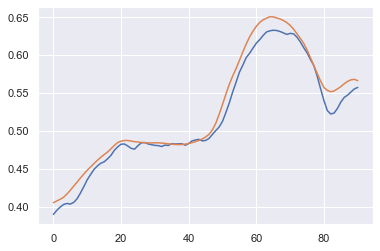

In [55]:
start = 0
end = X_test.shape[0]

plt.plot(df2.Predictions[start:end])
plt.plot(df2.Real[start:end])

In [56]:
# report performance
mse = mean_squared_error(df2['Real'], df2['Predictions'])
print('MSE: '+str(mse))
mae = mean_absolute_error(df2['Real'], df2['Predictions'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df2['Real'],df2['Predictions']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(df2['Predictions'] - df2['Real'])/np.abs(df2['Real']))
print('MAPE: '+str(mape))

MSE: 0.000190875228551257
MAE: 0.011243721651645654
RMSE: 0.013815760151046956
MAPE: 0.021021895383987858


******************************************************************************************************************************************************************************

## 4. Gated Recurrent Network (GRU)

In [75]:
model1 = Sequential()

model1.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(GRU(units=50, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(GRU(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 14, 50)            10500     
                                                                 
 dropout_18 (Dropout)        (None, 14, 50)            0         
                                                                 
 gru_13 (GRU)                (None, 14, 50)            15300     
                                                                 
 dropout_19 (Dropout)        (None, 14, 50)            0         
                                                                 
 gru_14 (GRU)                (None, 50)                15300     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [76]:
model1.compile(tf.keras.optimizers.Adam(learning_rate=0.01), 
               loss=tf.keras.losses.MeanSquaredError())

In [77]:
history1 = model1.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val) )

Epoch 1/10
51/51 [==============================] - 6s 28ms/step - loss: 0.0443 - val_loss: 3.3219e-04
Epoch 2/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 3.7878e-04
Epoch 3/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 4/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 5/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 9.4857e-05
Epoch 6/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 1.5532e-04
Epoch 7/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0015 - val_loss: 4.0812e-04
Epoch 8/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 2.3259e-04
Epoch 9/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0012 - va

In [78]:
predictions = model1.predict(X_test).flatten()
df = pd.DataFrame(data={'Predictions':predictions, 'Real': Y_test})
df

3/3 [==============================] - 1s 12ms/step


,Predictions,Real
0,0.406745,0.405175
1,0.410891,0.407416
2,0.410669,0.409628
3,0.413972,0.412307
4,0.415315,0.416618
...,...,...
86,0.556297,0.562142
87,0.560013,0.565312
88,0.566787,0.567353
89,0.568698,0.567986


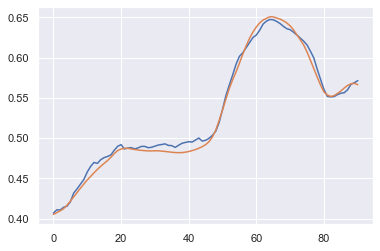

In [79]:
start = 0
end = X_test.shape[0]

plt.plot(df.Predictions[start:end])
plt.plot(df.Real[start:end])

In [80]:
    
# report performance
mse = mean_squared_error(df['Real'], df['Predictions'])
print('MSE: '+str(mse))
mae = mean_absolute_error(df['Real'], df['Predictions'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df['Real'],df['Predictions']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(df['Predictions'] - df['Real'])/np.abs(df['Real']))
print('MAPE: '+str(mape))

MSE: 4.13155072080609e-05
MAE: 0.005396014756681487
RMSE: 0.006427713995508893
MAPE: 0.01041329080423181


******************************************************************************************************************************************************************************